# Big project

## Submission

Submit solutions to https://forms.office.com/e/WexY7YraJb.

1.   Upload code in .ipynb file
2.   Upload a csv containing three columns: 
*    "ID": the ID of the instance (1, 2, 3, ...)
*    "OBJ": the objective function value obtained
*    "TIME": the execution time in seconds.

## Evaluation

1.   Gap w.r.t. optimal solutions
2.   Runtimes. Must be under 10 minutes for every instance. Execution times will be re-examined on a random basis.

## Deadline

12/01/2022 23:59 CET

## Other

*   4 lab points just if you deliver something that works
*   10 points based on the quality of method
*   NO pre-coded libraries, 
*   NO genetic algorithms 
*   NO neural networks
*   groups of max 3 students




# Group Members
Mario Cela 10685242

Giovanni Baccichet 10851745

Luca Cassenti 10667208

## Biogas plants location

An association of $n$ farmers wants to open $p$ plants to produce energy from biogas. 
Each plant will be opened at a farm of a member of the association and will be powered with corn chopping purchased from the farm itself or from other neighboring farms.

Each farm $i$ can provide at most $c_i$ tons of corn chopping, with a percentage of dry matter $a_i$. As you may know, dry matter is the key component of corn chopping used for biogas production. In order to maintain the quality of produced energy, each plant must burn a mixture of corn chopping with a percentage of dry matter between $k_{min}$ and $k_{max}$. 

At most one plant can be located in each farm, and every farm can sell its corn chopping to one and only one plant.

Each farm $i$ is located at coordinates $x_i$ and $y_i$, representing respectively its latitude and longitude, and the cost of moving corn chopping from a farm $i$ to a farm $j$ is proportional to the euclidean distance between the two farms (it does not depend on the actual quantity moved, since the trucks used for this transportations are sufficiently big). 

Under such conditions, every plant produces $Q$ kWh of energy per ton of corn chopping burned. The energy produced by each plant will be fed into the national electricity system, at a unitary price of $b$ (€/kWh). Moreover, due to state regulations, each plant must not produce more than $M$ kWh of energy.

You must locate $p$ plants among the available farms and assign the farms that will supply each plant, with the goal of maximizing the total revenues of the association.

### Sets
*   $I$ = set of farms

### Parameters
*   $n$ = number of farms   
*   $p$ = number of plants to locate
*   $b$ = revenue per unit of energy (€/kWh)
*   $M$ = max energy production (kWh)
*   $Q$ = energy produced by a ton of corn chopping (kWh/t)
*   $k_{min} (k_{max})$ = min (max) percentage of dry matter for fermentation
*   $a_i$ = percentage of dry matter in chopping from farm $i \in I$
*   $c_i$ = tons of corn chopping available for each $i \in I$ (t)
*   $x_i, y_i$ = coordinates of farm $i \in I$

### Model
1. We must have a total of $p$ plants located:
    
  $\sum_{i \in I} u_i = p$
    
2. When a corn chopping is moved from a farm $i$, it must be sent to one and only one farm/plant:
    
  $\sum_{j \in I} (v_{ij}) \le 1$     that must hold for each farm $i\in I$
    
3. The amount of corn chopping that will be moved from a farm $i$ to a farm/plant $j$ can be greater than zero if and only if it is $v_{ij} = 1$. If it holds, $w_{ij}$ must not be greater than the availability of corn chopping of the farm $i$:
    
  $0 \leq \sum_{j\in I} (w_{ij} \cdot v_{ij}) \le c_i$     that must hold for each $(i, j)\in I \times I$
    
4. What is burnt by a plant, must have a dry matter percentage between specific values. For each farm $i$, we consider the backward star and we sum all the corn chopping that is coming to the farm $i$. We get the average and we impose that it is greater than a minimum. It is the same for the maximum. 
    
    It holds for each farm because if the farm $i$ is not a plant, it will be $0 \le 0$, because we know from the previous constraints that $w_{ji}$ is greater than $0$ if the arc $v_{ji}$ is active, which in turn is $1$ if $x_i$ is $1$. So, the constraints are:
    
  $\sum_{j\in I}(w_{ji}\cdot a_j)\geq k_{min}\cdot (\sum_{j\in I}(w_{ji}))$     that must hold for each farm $i\in I$
    
  $\sum_{j\in I}(w_{ji}\cdot a_j)\leq k_{max}\cdot (\sum_{j\in I}(w_{ji}))$     that must hold for each farm $i\in I$
    
5. Due to state regulations, we have a limit on the energy produced by each plant. This constraint is introduced for each farm $i$. So, it is:
    
  $(\sum_{j\in I} (w_{ji}))\ \cdot\ Q \le M$

6. When the corn chopping is moved from a farm $i$ to another farm $j$, the farm $j$ must be a plant:
    
  $v_{ij} \le u_j$     that must hold for each $(i, j)\in I \times I$

### Optimization Function

#### Original
$$
max\bigg\{\sum_{i\in I}\sum_{j\in I} w_{ij}\cdot Q\cdot b - \sum_{i\in I} \sum_{j\in I} v_{ij}\cdot d_{ij}\bigg\}
$$

#### With Heuristic
$$
max\bigg\{\sum_{i\in I}\sum_{j\in I} w_{ij}\bigg\}
$$

### Code

In [113]:
# Clean files if present
!rm instance_1.json
!rm instance_1.txt

# Download instance_1 (both instance and solution) directly from Github
!wget https://raw.githubusercontent.com/Daddeee/FOR_Labs_22-23/master/big-project/instances/instance_1.json
!wget https://raw.githubusercontent.com/Daddeee/FOR_Labs_22-23/master/big-project/results/instance_1.txt

--2023-01-11 22:31:37--  https://raw.githubusercontent.com/Daddeee/FOR_Labs_22-23/master/big-project/instances/instance_1.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 572 [text/plain]
Saving to: ‘instance_1.json’

instance_1.json     100%[===================>]     572  --.-KB/s    in 0s      

2023-01-11 22:31:37 (28.3 MB/s) - ‘instance_1.json’ saved [572/572]

--2023-01-11 22:31:37--  https://raw.githubusercontent.com/Daddeee/FOR_Labs_22-23/master/big-project/results/instance_1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK


In [114]:
!pip install --upgrade cffi==1.15.0
import importlib
import cffi
importlib.reload(cffi)
!pip install mip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [115]:
import os
import mip
import time
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

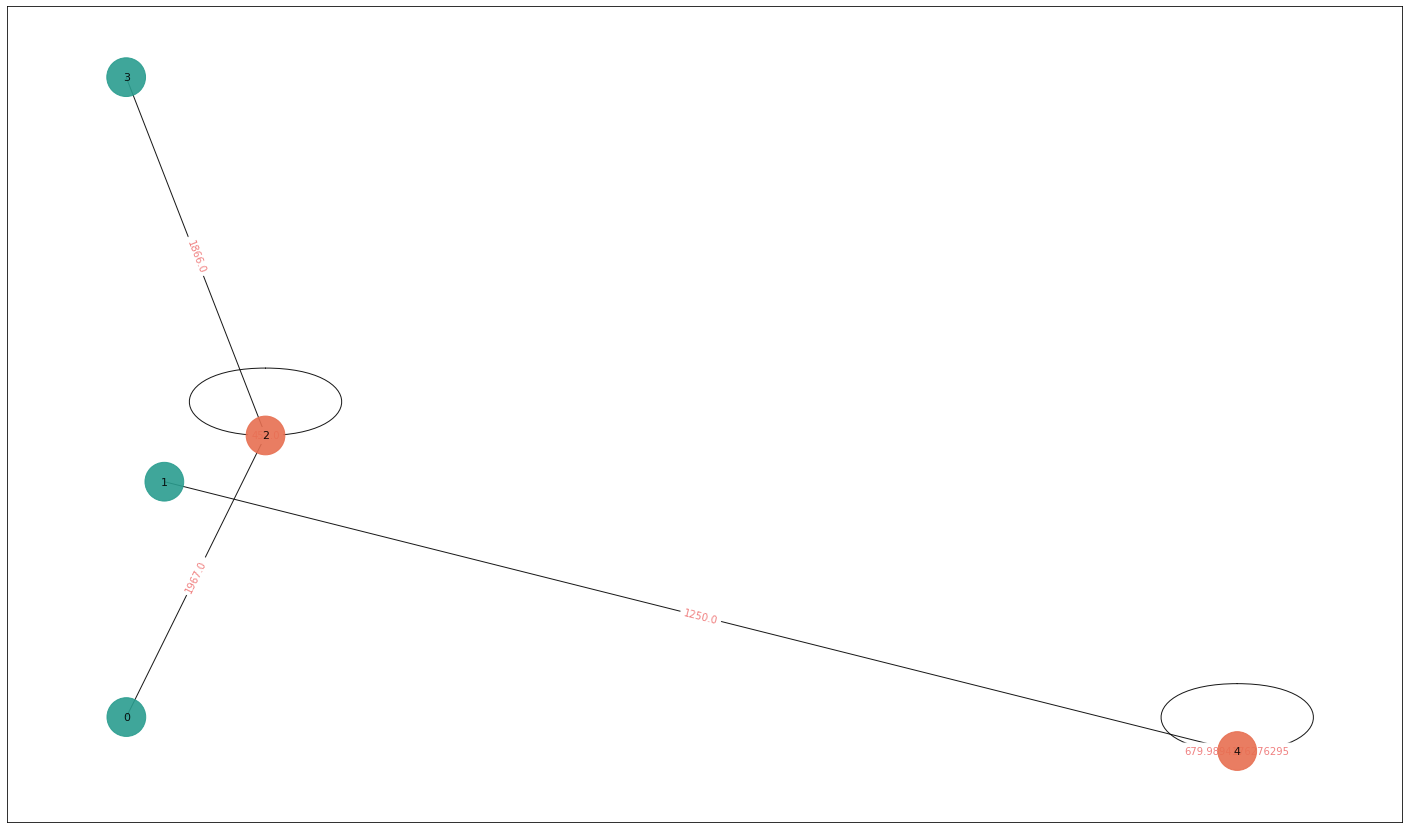

Cost: 1324477.67 M euro
Plants:
  2 -->   1.000; farms: 0 (1967.00/1967.00); 2 (452.00/452.00); 3 (1866.00/1866.00); 
  4 -->   1.000; farms: 1 (1250.00/1250.00); 4 (679.99/756.00); 
result: 1324477.6736137536
expected: 1324477.6736137536
gap: 0.0


In [116]:
import json

# Reads a .json instance and returns it in a dictionary
def load_instance(filename):
  with open(filename, 'r') as f:
    data = json.load(f)
  return data

# Reads a .txt result and returns it
def load_result(filename):
  with open(filename, 'r') as f:
      result = f.read()
  return float(result)

# SUPPORT FUNCTIONS

# This function computes the distances between all pairs of points
def distance_matrix(points_matrix):
  return [[np.linalg.norm(i - j) for i in points_matrix] for j in points_matrix]

# This functions is a text visualizer for the solution
def print_result(optimal_result, v, u, w, farm_indexes, corn_availability):
    
  print(f"Cost: {optimal_result:.2f} M euro")

  print("Plants:")
  for plant in farm_indexes:
    if u[plant].x > 1e-7:
      print(f"{plant:3d} --> {u[plant].x:7.3f}; farms: ", end='')
      for farm in farm_indexes:
        if v[farm][plant].x > 1e-7:
          print(f"{farm} ({w[farm][plant].x:.2f}/{corn_availability[farm]:.2f}); ", end='')
      print('')

def solve(instance):

  # Start timer for evaluation
  start_time = time.time()

  # Model Initialization
  model = mip.Model(sense="MAXIMIZE", solver_name="CBC")

  # Sets
  farm_indexes = range(instance["n"])

  # Parameters
  max_energy_production = instance["M"]  # M is max energy production
  energy_per_ton = instance["Q"]  # Energy produced for ton (kWh / ton)
  dry_matter_array = np.array(instance["a"])  # % of dry matter
  revenue_per_kwh = instance["b"]  # Revenue (Euros / kWh)
  corn_availability = np.array(instance["c"])  # Availability (ton)
  dry_matter_max = instance["kmax"]  # Max % of dry matter
  dry_matter_min = instance["kmin"]  # Min % of dry matter
  number_of_farms = instance["n"]  # Number of farms
  number_of_plants = instance["p"]  # Number of plants
  coordinates = instance["points"]  # Coordinates of farms (x, y)
  points = np.array([np.array(coordinates[index]) for index in farm_indexes])

  # Variables
  u = np.array([model.add_var(name="is_plant", var_type=mip.BINARY) for farm in farm_indexes])  # Represents if plant exists in farm i
  v = np.array([np.array([model.add_var(name="selling_to", var_type=mip.BINARY) for farm in farm_indexes]) for plant in farm_indexes])  # Represents if farm i sells to plant j
  w = np.array([np.array([model.add_var(name="material_amount", var_type=mip.CONTINUOUS, lb=0.0) for farm in farm_indexes]) for plant in farm_indexes])  # Represents quantity farm i sells to plant j
  
  # Heuristic
  # Since in the given instances revenues are way higher than costs, it is possible to choose in advance all the plants, in fact even the worst positioning
  # still grants an almost optimal result. Thus we decided to proceed following this idea.
  # We decided to choose our plants based on the corn available, as a plant with more corn should require less corn from other farms, thus reducing costs
  # Following this heurisitic results in the constraint on the number of plants being already satisfied, thus we won't include it

  heuristic_plants = sorted([farm for farm in farm_indexes], key=lambda farm: abs(corn_availability[farm] - max(corn_availability))/max(corn_availability))[::-1][:number_of_plants]

  for farm in farm_indexes:
    if farm in heuristic_plants:
      model.add_constr(u[farm] == 1)
    else:
      model.add_constr(u[farm] == 0)

  # Constraints

  # 1) Redudant

  # 2) When the corn chopping is moved from a farm it must be sent to one and only one plant
  for farm in farm_indexes:
    model.add_constr(mip.xsum(v[farm]) <= 1)

  # 3) We can move the corn chopping if and only if the corresponding farm is selling to a specific plant
  for farm in farm_indexes:
    for plant in farm_indexes:
        model.add_constr(w[farm][plant] <= corn_availability[farm] * v[farm][plant])

  # 4) The corn chopping that each plant burns must have a percentage amount of dry matter within a specified range
  for plant in farm_indexes:
    model.add_constr(mip.xsum(np.multiply(w[:, plant], dry_matter_array)) >= mip.xsum(w[:, plant]) * dry_matter_min)
    model.add_constr(mip.xsum(np.multiply(w[:, plant], dry_matter_array)) <= mip.xsum(w[:, plant]) * dry_matter_max)

  # 5) Due to state regulations, we have a limit on the energy produced by each plant. This constraint is introduced for each plant
  for plant in farm_indexes:
    model.add_constr(mip.xsum(w[farm][plant] for farm in farm_indexes) * energy_per_ton <= max_energy_production)

  # 6) When the corn chopping is moved from a farm to another farm, the receiving farm must be a plant:
  for farm in farm_indexes:
    for plant in farm_indexes:
        model.add_constr(v[farm][plant] <= u[plant])

  # Optimization
  # We decided to only focus on the optimization of the revenue and not the minimization of the distances due to what we
  # mentioned above. This only marginally changes the results and only worsen it, thus it's still a feasible solution.

  model.objective = mip.maximize(mip.xsum(w.flatten()))  # Maximize the revenue
  status = model.optimize()

  # Calculate the effective result, now including the cost due to distances
  distances = np.array(distance_matrix(points))
  v_optimized = np.array([np.array([v[farm][plant].x for plant in farm_indexes]) for farm in farm_indexes])
  result = model.objective_value * energy_per_ton * revenue_per_kwh - sum(np.multiply(np.array(distances), v_optimized).flatten())

  # End timer for evaluation
  end_time = time.time()
  execution_time = end_time - start_time

  # Data visualization
  G = nx.Graph()

  for farm in farm_indexes:
    G.add_node(farm, pos=points[farm])

  pos=nx.get_node_attributes(G,'pos')

  color_map = []

  for plant in farm_indexes:
    if u[plant].x == 1:
      color_map.append('#e76f51' )
    else:
      color_map.append('#2a9d8f')

  for farm in farm_indexes:
    for plant in farm_indexes:
      if v[farm][plant].x == 1:
        G.add_edge(farm, plant, label=w[farm][plant].x)

  plt.figure(1, figsize=(25,15))
  nx.draw_networkx(G, font_size=11, pos=pos, node_color=color_map, node_size=1500, alpha=0.90)
  nx.draw_networkx_edge_labels(G,pos,edge_labels=nx.get_edge_attributes(G,'label'), font_color='#f08080')
  plt.show()

  print_result(result, v, u, w, farm_indexes, corn_availability)

  # Return result
  return result


inst = load_instance("instance_1.json")
res = load_result("instance_1.txt")

obj = solve(inst)

gap = 100 * (obj - res) / res

print("result: {}".format(obj))
print("expected: {}".format(res))
print("gap: {}".format(gap))